# Understanding Over & Underfitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

In [77]:
# Import your libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go 
%matplotlib inline

In [78]:
import warnings
warnings.filterwarnings('ignore') # ignore warnings

In [79]:
# Set the maximum number of displayed columns
pd.set_option('display.max_columns', None)

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

### Import and explore the data. Clean the data for outliers and missing values. 

In [80]:
# Your code here
boston_housing = pd.read_csv(r'C:\Users\zluca\OneDrive\LAURA\Ironhack - data analyst\GitHub\week 19\lab-problems-in-ml\data\boston_data.csv')

In [81]:
print(boston_housing.shape)
boston_housing.head()

(404, 14)


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5


In [82]:
# check for outliers or peculiar patterns first by looking at the statistics
boston_housing.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.00000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.730912,10.509901,11.189901,0.069307,0.556710,6.30145,68.601733,3.799666,9.836634,411.688119,18.444554,355.068243,12.598936,22.312376
std,8.943922,22.053733,6.814909,0.254290,0.117321,0.67583,28.066143,2.109916,8.834741,171.073553,2.150295,94.489572,6.925173,8.837019
min,0.006320,0.000000,0.460000,0.000000,0.392000,3.56100,2.900000,1.169100,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082382,0.000000,5.190000,0.000000,0.453000,5.90275,45.800000,2.087875,4.000000,281.000000,17.375000,374.710000,7.135000,17.100000
50%,0.253715,0.000000,9.795000,0.000000,0.538000,6.23050,76.600000,3.207450,5.000000,330.000000,19.000000,391.065000,11.265000,21.400000
75%,4.053158,12.500000,18.100000,0.000000,0.631000,6.62925,94.150000,5.222125,24.000000,666.000000,20.200000,396.007500,16.910000,25.000000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.78000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,34.370000,50.000000


In [83]:
# I see there are definetely huge values that are very fare away from the mean in the first two features (CRIM - per capita crime rate by town -  and ZN - proportion of residential land zoned for lots over 25,000 sq.ft).
# CHAS is a categorical column - the values are 0 or 1 and stand for 'not close to the river' and 'close to the river'. DIS statistics could also be mildly affected by outliers.
# TAX ans BLACK have a very high standard deviation, so they can be investigated too. 
# I will try to visualize these feature's distribution with boxplots.

In [84]:
# let's check if the intuitions are correct by visualization
fig = px.box(boston_housing, points='outliers', orientation='h')
fig.show()

In [85]:
# After this plot, my conclusions are that BLACK, ZN and CRIM are affected by outliers - with BLACK being hugely affected. 
# Since this is also a controversial feature, because it teaches the model a racist pattern (where the median house pricing value it is pointed out to be affected by the neighborhood 'blackness'),
# we could remove this feature. If we decide to keep it, but to clean overall outliers, we could try to apply different tecniques.

# TAX features has a huge standard deviation, but no outliers, so we could take this into account by scaling the dataframe.

In [86]:
boston_housing_cleaned = boston_housing.drop(columns='black', axis=1)
print(boston_housing_cleaned.shape)

(404, 13)


In [87]:
px.box(boston_housing_cleaned, points='outliers', orientation='h')

In [88]:
Q1 = boston_housing.quantile(0.25)
Q3 = boston_housing.quantile(0.75)
IQR = Q3 - Q1

boston_housing_IQR_cleaned = boston_housing[~((boston_housing < (Q1 - 1.5 * IQR)) | (boston_housing > (Q3 + 1.5 * IQR))).any(axis=1)]

In [89]:
px.box(boston_housing_IQR_cleaned, points='outliers', orientation='h')

In [90]:
from scipy import stats

z_scores = stats.zscore(boston_housing)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)

boston_housing_zscore_cleaned = boston_housing[filtered_entries]
print(boston_housing_zscore_cleaned.shape)

(321, 14)


In [91]:
px.box(boston_housing_zscore_cleaned, points='outliers', orientation='h')

In [92]:
# My decision is to use the boston_housing_cleaned version where the column BLACK has been removed (it was the column with the highest concentration of outliers and a controversial one).
# This choice does also not affect the total number of rows of our dataset and let us keep more data.

In [93]:
# check for NaNs
boston_housing_cleaned.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
lstat      0
medv       0
dtype: int64

### Next, we want to explore the data. Pick several varibables you think will be most correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.

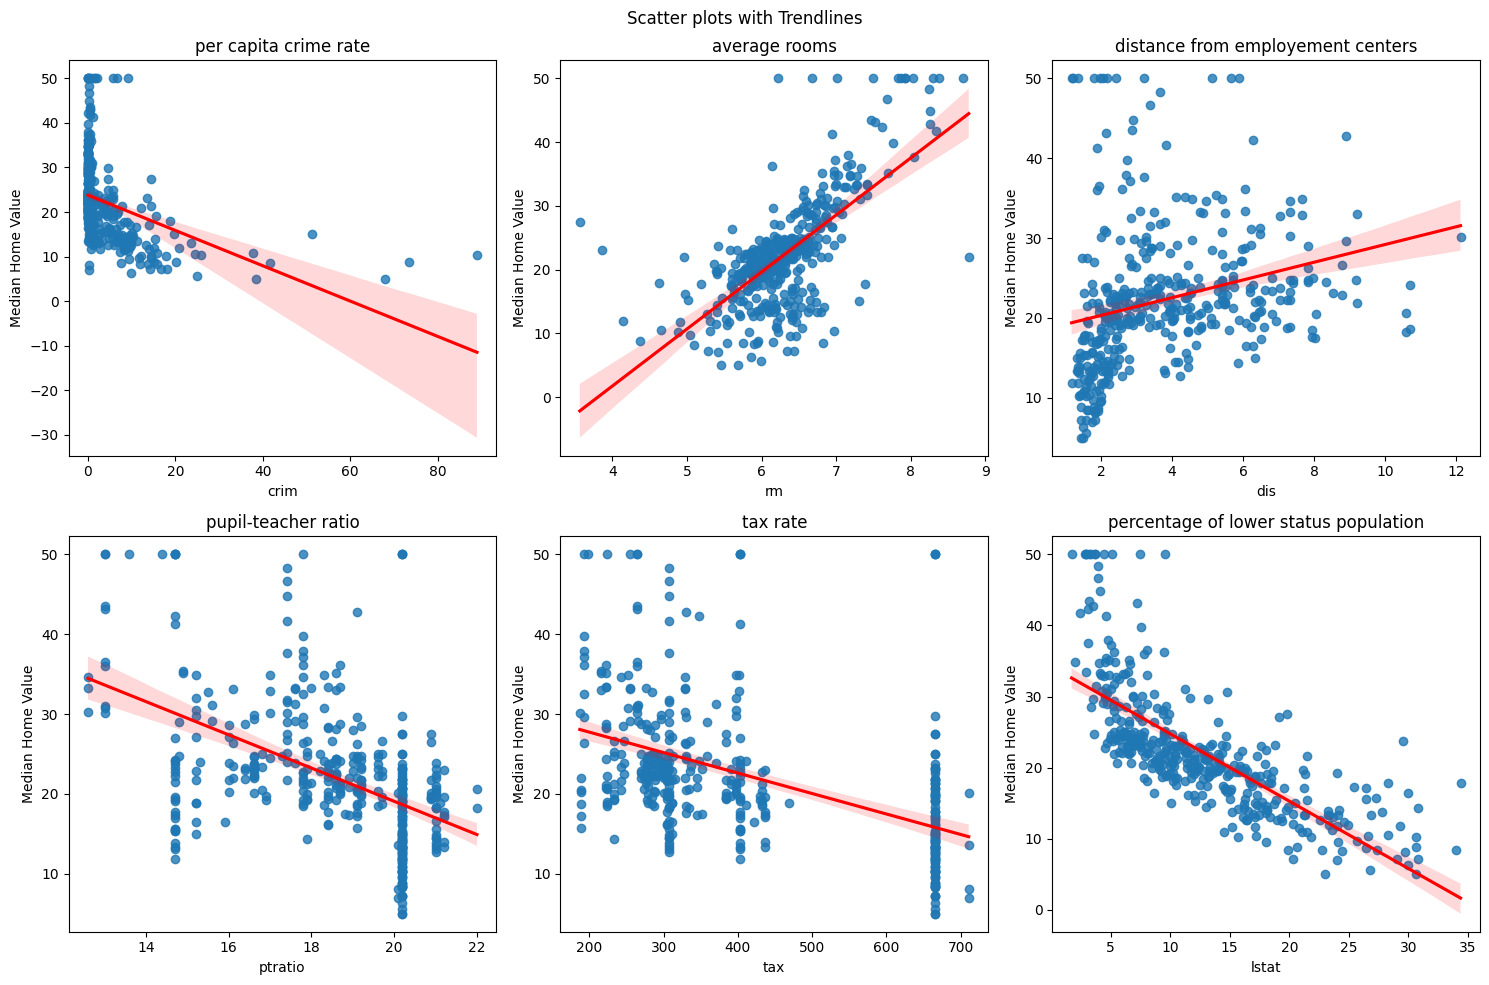

In [94]:
# I select at first the per capita crime rate, the average number of rooms per dwelling, the weighted distance to employement centers, the pupil-teacher ratio, the tax-rate, and the % lower status of the population.
selected_features = ['crim','rm', 'dis', 'ptratio', 'tax','lstat']
features_dictionary = {'crim' : 'per capita crime rate',
                      'rm': 'average rooms', 
                      'dis' : 'distance from employement centers',  
                      'ptratio' : 'pupil-teacher ratio', 
                      'tax':'tax rate',
                      'lstat': 'percentage of lower status population'}

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
fig.suptitle('Scatter plots with Trendlines')


for i, feature in enumerate(selected_features):
    row, col = i // 3, i % 3  # calculating the position of each plot using the feature's index in the list selected_features
    ax = axes[row, col]
    
    # Scatter plot with trendline - seaborn regplot function
    sns.regplot(x=feature, y='medv', data=boston_housing_cleaned, ax=ax, line_kws={'color': 'red'})
    
    ax.set_title(features_dictionary[feature])
    ax.set_xlabel(feature)
    ax.set_ylabel('Median Home Value')

plt.tight_layout() 
plt.show()

### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

In [95]:
# I expected RM and LSTAT to be highly correlated (one positively and the other negative) with the target variable. 
# I also expected PTRATIO to be more correlated with the median house value, because better schools in the neighboorhood usually are a factor that increases the house price (there is indeed a negative covariance shown in the plot).
# What surprises me most, is TAX: I assumed that the higher the tax value, the higher the house price, but there seems to be no strong correlation between this variable and our target.

### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

In [96]:
boston_housing_corr = boston_housing_cleaned.corr()
boston_housing_corr.style.background_gradient(cmap='RdYlGn').format('{:,.2f}')

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
crim,1.00,-0.19,0.40,-0.06,0.41,-0.17,0.35,-0.38,0.60,0.57,0.29,0.43,-0.40
zn,-0.19,1.00,-0.53,-0.04,-0.50,0.30,-0.55,0.66,-0.31,-0.29,-0.37,-0.41,0.36
indus,0.40,-0.53,1.00,0.06,0.76,-0.35,0.63,-0.70,0.62,0.72,0.36,0.61,-0.50
chas,-0.06,-0.04,0.06,1.00,0.10,0.09,0.08,-0.10,-0.02,-0.04,-0.12,-0.04,0.14
nox,0.41,-0.50,0.76,0.10,1.00,-0.27,0.73,-0.76,0.61,0.66,0.17,0.59,-0.44
rm,-0.17,0.30,-0.35,0.09,-0.27,1.00,-0.21,0.18,-0.17,-0.24,-0.32,-0.58,0.68
age,0.35,-0.55,0.63,0.08,0.73,-0.21,1.00,-0.73,0.47,0.50,0.23,0.60,-0.39
dis,-0.38,0.66,-0.70,-0.10,-0.76,0.18,-0.73,1.00,-0.50,-0.53,-0.21,-0.50,0.26
rad,0.60,-0.31,0.62,-0.02,0.61,-0.17,0.47,-0.50,1.00,0.92,0.49,0.50,-0.42
tax,0.57,-0.29,0.72,-0.04,0.66,-0.24,0.50,-0.53,0.92,1.00,0.47,0.54,-0.50


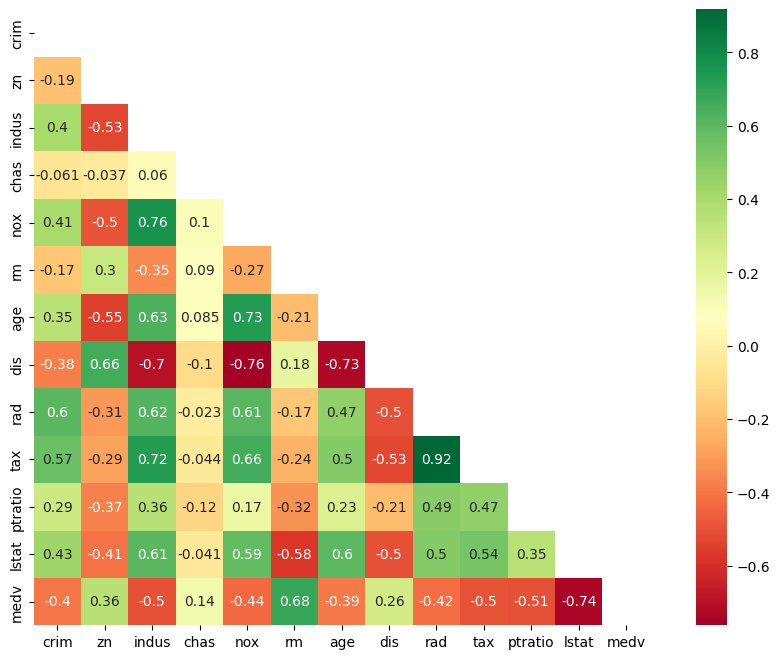

In [97]:
mask = np.triu(np.ones_like(boston_housing_corr, dtype=bool))
plt.figure(figsize=(12,8))
sns.heatmap(boston_housing_corr, annot=True, cmap='RdYlGn', square=True, mask=mask)
plt.show()

In [98]:
# The heatmap shows very high positive correlation between TAX and RAD, suggesting that the value of the house tax might be highly affected by the distance from the highways. 
# It would be wise to keep just one of those highly correlated features when we proceed with modeling. I would eliminate RAD because it is (negatively) less correlated to our target.
# TAX is also positively correlated with INDUS (proportion of non-retail business acres per town), but the correlation is < 0.9, so we can keep the variable.

In [99]:
boston_housing_cleaned.drop(columns='rad', inplace=True, axis=1)

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation. 

In [100]:
boston_housing_cleaned.medv.describe()

count    404.000000
mean      22.312376
std        8.837019
min        5.000000
25%       17.100000
50%       21.400000
75%       25.000000
max       50.000000
Name: medv, dtype: float64

----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance metric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [101]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    r2 = r2_score(y_true, y_predict)
    mse = mean_squared_error(y_true, y_predict)
    return r2, mse

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test. 

In [102]:
from sklearn.model_selection import train_test_split

X = boston_housing_cleaned.drop('medv', axis=1)
y = boston_housing_cleaned['medv']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, shuffle=True)

----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [103]:
# Five separate RFR here with the given max depths
from sklearn.ensemble import RandomForestRegressor

depth_values = [2, 4, 6, 8, 10]
forests = {}

for depth in depth_values:
    forest = RandomForestRegressor(n_estimators=100, # this parameter it is also chosen random and should be tuned with a grid search...
                               #max_samples=100,
                               #max_features=0.6,
                               max_depth=depth, 
                               random_state=1) # fixing rand because I'm insecure and afraid you will judge me if I get a bad random selection that does not prove my point
    forest.fit(X_train, y_train)
    y_train_predict = forest.predict(X_train)
    y_test_predict = forest.predict(X_test)
    forests[f'max_depth_{depth}'] = {'model': forest, 
                                     'train_score': performance_metric(y_train, y_train_predict),
                                     'test_score' : performance_metric(y_test, y_test_predict)}   

In [104]:
forests

{'max_depth_2': {'model': RandomForestRegressor(max_depth=2, random_state=1),
  'train_score': (0.7749576034126904, 18.471369557440248),
  'test_score': (0.8040507446877622, 11.58484670548049)},
 'max_depth_4': {'model': RandomForestRegressor(max_depth=4, random_state=1),
  'train_score': (0.9104088824216664, 7.353594997871619),
  'test_score': (0.820429403743314, 10.616513071869342)},
 'max_depth_6': {'model': RandomForestRegressor(max_depth=6, random_state=1),
  'train_score': (0.9520927138265618, 3.932206556733436),
  'test_score': (0.8305236529083361, 10.019724229792015)},
 'max_depth_8': {'model': RandomForestRegressor(max_depth=8, random_state=1),
  'train_score': (0.9669188699582486, 2.7152829317735145),
  'test_score': (0.8387132961397897, 9.535538866301934)},
 'max_depth_10': {'model': RandomForestRegressor(max_depth=10, random_state=1),
  'train_score': (0.9723741936412719, 2.2675126390078915),
  'test_score': (0.8400552091098303, 9.456202733968873)}}

Now, plot the score for each tree on the training set and on the testing set.

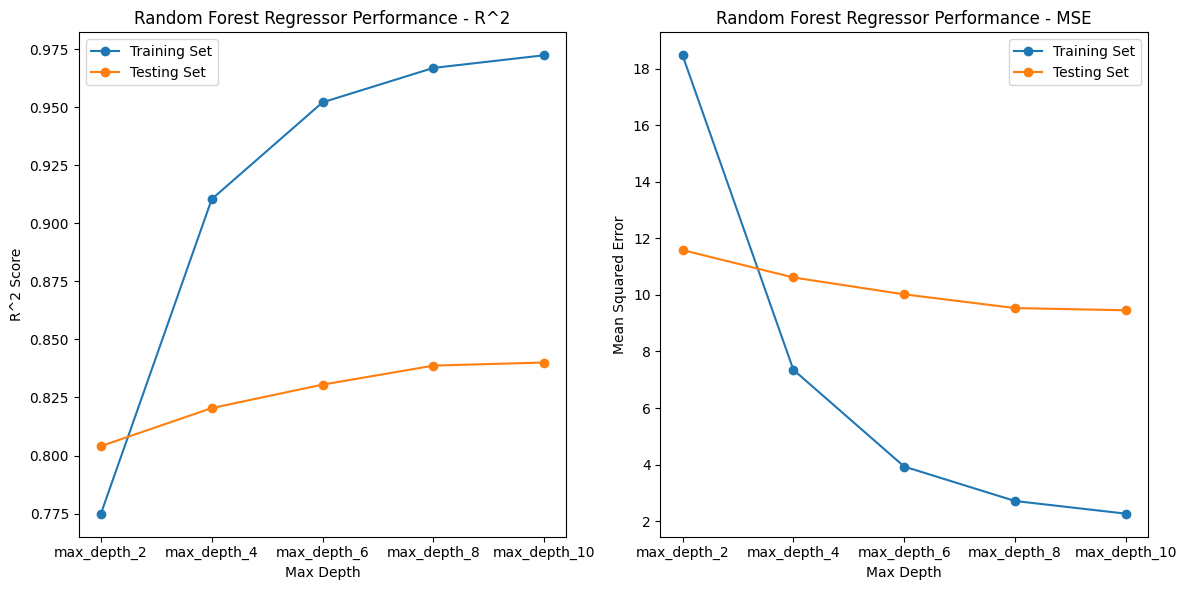

In [105]:
# Produce a plot with the score for the testing and training for the different max depths

depths = list(forests.keys())
train_r2_scores = [result['train_score'][0] for result in forests.values()]
test_r2_scores = [result['test_score'][0] for result in forests.values()]
train_mse_scores = [result['train_score'][1] for result in forests.values()]
test_mse_scores = [result['test_score'][1] for result in forests.values()]

# reating a subplot for 2 plots 
plt.figure(figsize=(12, 6))

# Plotting R^2 scores
plt.subplot(1, 2, 1)
plt.plot(depths, train_r2_scores, label='Training Set', marker='o')
plt.plot(depths, test_r2_scores, label='Testing Set', marker='o')
plt.xlabel('Max Depth')
plt.ylabel('R^2 Score')
plt.title('Random Forest Regressor Performance - R^2')
plt.legend()

# Plotting MSE scores
plt.subplot(1, 2, 2)
plt.plot(depths, train_mse_scores, label='Training Set', marker='o')
plt.plot(depths, test_mse_scores, label='Testing Set', marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Mean Squared Error')
plt.title('Random Forest Regressor Performance - MSE')
plt.legend()

# Adjust layout
plt.tight_layout()
plt.show()


What do these results tell you about the effect of the depth of the trees on the performance of the model?

In [106]:
# Tuning the depth of the trees has some positive effect on how the model learns,
# but not in the same rate for training and test set. 
# The learning improvement rate for the test set increases highly, while that of the training moderately increaeses and at some point stabilizes (there is no great difference between max depth 8 and 10).
# This - together with the fact that in all max depth variations, the MSE is a lot higher for the test score, than for the train score - suggests that the random forest regressor model is prone to overfitting our data.

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10? Check out this article before answering: https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-165e6942b229

In [107]:
# When the model is trained with a maximum depth of 1 will suffer from high bias (and lower variance) and will probably be to simple to capture the pattern underlying the training data (therefore also unable to perform well on the testing data).
# Bias is indeed the difference between the average prediction of our model and the correct value which we are trying to predict.
# If a model is trained with a maximum depth of 10 or more, it is possible that it will have high variance (and lower bias). 
# Variance is the variability of model prediction for a given data point or a value which tells us spread of our data. 
# So, the model with a higher value for the max_depth parameter will perform very well on the training data and minimize the error for this dataset, 
# but perform worse on the test data, because it won'tt learn the pattern underlying the training data that is also valid for the testing data, as much as it will learn the training data as such (danger of overfitting).

### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

In [108]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [10, 50, 100, 150, 200], 
    # as I pointed out before, the number of trees (=estimators) needs also to be tuned.
    'max_depth': [2, 4, 6, 8, 10]
}

rf = RandomForestRegressor(random_state=1)

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5) 
# I try to see if changing the scoring metric changes something in the next cell.

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)


Best Parameters: {'max_depth': 10, 'n_estimators': 150}


In [109]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [10, 50, 100, 150, 200],
    'max_depth': [2, 4, 6, 8, 10]
}

rf = RandomForestRegressor(random_state=1)

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='r2', cv=5)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

Best Parameters: {'max_depth': 10, 'n_estimators': 150}


In [113]:
y_predict_best = best_model.predict(X_test)
performance_metric(y_test, y_predict_best)

(0.9774858047043036, 1.3310767666979924)

In [ ]:
# I used GridSearch to choose the best parameters.
# If I only looked at the plots, I would have chosen depth between 8 or 10.
# This result for the testing data is actually good, because the mean squared error is also lower compared to the values I saw by trying different max_depth and keeping the n_estimators set to 100.

### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

In [110]:
# The constructed model should not be used in a real-world setting due to several reasons:
# 1. The data was collected in 1978 and geographically limited to Boston and is not relevant today, as real estate market hugely changed in decades, as well as outside of the city of Boston.
# 2. The features are too few (for example, there is no indication of the type of home: apartments, houses, condos in downtown etc.)
# 3. The 'blackness' feature I removed is highly controversial and suggests that there might be bias from the creators of this dataset also for the choice of other features.
# 4. To have good data for applying this model today, we need recent data and a a lot more 'rows' than the 404 in this dataset.